# Business Understanding

## Loading Libraries and Data

Libraries

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
from re import sub
from decimal import Decimal
from matplotlib import pyplot as plt
import datetime
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import word_tokenize, WordNetLemmatizer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer, StandardScaler
from math import sqrt
import tests as t
import re
import nltk
from sklearn.preprocessing import OneHotEncoder
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
import folium

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import xgboost as xgb
pd.set_option('display.max_columns', 106)
sns.set(font_scale=2) 

import collections

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sousa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sousa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sousa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Data loading

All the data loaded in this cell was sourced from here: http://insideairbnb.com/get-the-data.html

In [2]:
#Porto related data
porto_listings_plus = pd.read_csv(r"C:\Users\sousa\Desktop\github\Airbnb Tale of 2 cities\Data Portugal\Porto\listings.csv.gz", compression = 'gzip')
porto_calendar = pd.read_csv(r"C:\Users\sousa\Desktop\github\Airbnb Tale of 2 cities\Data Portugal\Porto\calendar.csv.gz", compression = 'gzip')
porto_neighbourhoods = pd.read_csv(r"C:\Users\sousa\Desktop\github\Airbnb Tale of 2 cities\Data Portugal\Porto\neighbourhoods.csv")
porto_reviews = pd.read_csv(r"C:\Users\sousa\Desktop\github\Airbnb Tale of 2 cities\Data Portugal\Porto\reviews.csv")

#Lisbon related data
lisbon_calendar = pd.read_csv(r"C:\Users\sousa\Desktop\github\Airbnb Tale of 2 cities\Data Portugal\Lisbon\calendar.csv.gz", compression = 'gzip')
lisbon_neighbourhoods = pd.read_csv(r"C:\Users\sousa\Desktop\github\Airbnb Tale of 2 cities\Data Portugal\Lisbon\neighbourhoods.csv")
lisbon_reviews = pd.read_csv(r"C:\Users\sousa\Desktop\github\Airbnb Tale of 2 cities\Data Portugal\Lisbon\reviews.csv")
lisbon_listings_plus = pd.read_csv(r"C:\Users\sousa\Desktop\github\Airbnb Tale of 2 cities\Data Portugal\Lisbon\listings.csv.gz", compression = 'gzip')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
porto_listings_plus.shape

(11656, 106)

In [4]:
lisbon_listings_plus.shape

(25056, 106)

In [5]:
porto_listings_plus.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,41339,https://www.airbnb.com/rooms/41339,20191128004830,2019-11-28,Porto city flat near the sea,Here you'll find all you need for your holiday...,"Apartment facing Southeast, with a big bedroom...",Here you'll find all you need for your holiday...,none,In the surrounds you have Serralves Museum and...,--City Touristic Tax: Your stay includes 2€ pe...,There's a lot of public transports that takes ...,You have total access to the apartment.,CHECK-IN From 14:00 to 22:00 Depending on your...,"* The price includes electricity, water, wi-fi...",NaN,NaN,https://a0.muscache.com/im/pictures/25727334/9...,NaN,180050,https://www.airbnb.com/users/show/180050,Paula,2010-07-25,"Oporto, Porto District, Portugal","Olá, sou a Paula e adoro a minha cidade!\r\nAd...",within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/b2ec5...,https://a0.muscache.com/im/pictures/user/b2ec5...,NaN,19.0,19.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Porto, Porto, Portugal",NaN,Lordelo do Ouro e Massarelos,PORTO,Porto,Porto,4150,Porto,"Porto, Portugal",PT,Portugal,41.14894,-8.66113,f,Apartment,Entire home/apt,5,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",NaN,$58.00,NaN,NaN,$100.00,$30.00,2,$8.00,2,90,2,2,90,90,2.0,90.0,2 months ago,t,0,0,0,210,2019-11-28,17,0,2013-05-15,2018-09-28,93.0,9.0,10.0,10.0,10.0,9.0,9.0,t,29049/AL,"{Porto,"" PT Zip Codes"","" Porto"","" PT""}",t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.21
1,42462,https://www.airbnb.com/rooms/42462,20191128004830,2019-11-28,Large Penthouse in Vila Nova Gaia,The Afurada Harbour can be reached within 10 m...,It's the perfect choice for family holidays or...,The Afurada Harbour can be reached within 10 m...,none,NaN,Por favor contactem-me sempre que for necessário.,NaN,Os hóspedes podem estacionar as viaturas nas z...,Durante a sua estadia eu estarei sempre contac...,This apartment is not suitable for parties aft...,NaN,NaN,https://a0.muscache.com/im/pictures/12513715/7...,NaN,185492,https://www.airbnb.com/users/show/185492,Gabriela,2010-07-30,"Vila Nova de Gaia, Porto District, Portugal","Hi everyone, my name is Gabriela. I was born i...",within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/ebe25...,https://a0.muscache.com/im/p

In [6]:
lisbon_listings_plus.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6499,https://www.airbnb.com/rooms/6499,20191128004842,2019-11-28,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...",Fully furnished apartment (35m2). Small inside...,"This apartment is all about Location, next to ...",none,"To get to the city center, tram 15 stops in f...",Late check in's (after 20H) have an extra char...,The apartment is on the same street as the #15...,The entire apartment is at your disposal.,We'll check you in personally,Respect the neighbours.,NaN,NaN,https://a0.muscache.com/im/pictures/6422ee92-c...,NaN,14455,https://www.airbnb.com/users/show/14455,Bruno,2009-04-22,"Brussels, Bruxelles, Belgium","I am Bruno Luis, a Portuguese living in The Ha...",within an hour,100%,NaN,f,https://a0.muscache.com/im/users/14455/profile...,https://a0.muscache.com/im/users/14455/profile...,NaN,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Lisbon, Lisbon, Portugal",Belém,Belm,Lisboa,Lisbon,Lisbon,1300,Lisbon,"Lisbon, Portugal",PT,Portugal,38.69675,-9.19840,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""First ai...",377.0,$36.00,$209.00,$579.00,$100.00,$35.00,2,$15.00,3,365,3,3,365,365,3.0,365.0,yesterday,t,0,0,0,0,2019-11-28,25,16,2014-09-02,2019-11-05,90.0,9.0,9.0,10.0,10.0,10.0,9.0,t,NaN,"{Lisbon,"" PT Zipcodes"","" Lisbon"","" PT""}",t,f,moderate,f,f,1,1,0,0,0.39
1,25659,https://www.airbnb.com/rooms/25659,20191128004842,2019-11-28,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",Sunny 1 Bedroom cozy apartment in historic Alf...,"Charming, sunny, cozy apartment in the heart o...",Sunny 1 Bedroom cozy apartment in historic Alf...,none,Alfama is the oldest and most picturesque quar...,CHECK-IN 15h -24h ( 3pm - midnight) CHECK-O...,The apartment is very convenient to all kinds ...,CHECK-IN 15h -00h ( 3pm - midnight) CHECK-O...,I am available by email ( or in person if I am...,No smoking. No pets. Only booked guests are e...,NaN,NaN,https://a0.muscache.com/im/pictures/a4c86b5f-c...,NaN,107347,https://www.airbnb.com/users/show/107347,Ellie,2010-04-12,"New York, New York, United States",Artist,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/7c768...,https://a0.muscache.com/im/pictures/user/7c768...,Alfama,1.0,1.0,"['email', 'phone

### Cleanup and EDA

Since I will be comparing Porto to Lisbon one of the first things to check is if they have exactly the same columns on their dataframes.

In [7]:
def column_checker(porto_df, lisbon_df):
    '''
    Takes in 2 dataframes and checks if attributes match between the 2 dataframes 
    Args: any 2 dataframes 
    prints True or False if the dataframes match or not and which values are different
    '''
    porto_column_list = porto_df.columns.values
    lisbon_column_list = lisbon_df.columns.values
    
    equal = collections.Counter(porto_column_list) == collections.Counter(lisbon_column_list)
    
    print('The two tested dataframes are balanced: ', equal)
    
    if equal == False:
        print('The Porto df differs from Lisbon on the following columns: ')
        print(set(porto_column_list) - set(lisbon_column_list))
        
        print('The Lisbon df differs from the Porto df on the following colums: ')
        print(set(lisbon_column_list) - set(porto_column_list))

In [8]:
#checking column balance between listings
column_checker(porto_listings_plus, lisbon_listings_plus)

The two tested dataframes are balanced:  True


In [9]:
#checking column balance between calendar
column_checker(porto_calendar, lisbon_calendar)

The two tested dataframes are balanced:  True


In [10]:
#checking column balance between neighbourhoods
column_checker(porto_neighbourhoods, lisbon_neighbourhoods)

The two tested dataframes are balanced:  True


In [11]:
#checking column balance between reviews
column_checker(porto_reviews, lisbon_reviews)

The two tested dataframes are balanced:  True


In [12]:
#checking the shape of the dfs:
print(porto_listings_plus.shape)
print(lisbon_listings_plus.shape)
print(porto_calendar.shape)
print(lisbon_calendar.shape)
print(porto_reviews.shape)
print(lisbon_reviews.shape)
print(porto_neighbourhoods.shape)
print(lisbon_neighbourhoods.shape)

(11656, 106)
(25056, 106)
(4254440, 7)
(9145440, 7)
(501193, 2)
(1033354, 2)
(173, 2)
(134, 2)


The neighbourhoods dfs have information that is repeated in the listings df. So I will drop their usage from here on.

All the dataframes have the same columns which is great, no information needs to be dropped

Checking column data types

In [13]:
porto_listings_plus.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 106, dtype: object

In [14]:
porto_calendar.dtypes

listing_id         int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights     int64
maximum_nights     int64
dtype: object

In [15]:
porto_neighbourhoods.dtypes

neighbourhood_group    object
neighbourhood          object
dtype: object

In [16]:
porto_reviews.dtypes

listing_id     int64
date          object
dtype: object

To reduce the data in usage and make EDA easier I will start by dropping columns that are on no interest, namely regarding hyperlinks, images and repeated information

In [17]:
#checking if these 2 colunms are the same so I can drop one of them, I suspect they are dup info
porto_listings_plus['host_listings_count'].equals(porto_listings_plus['host_total_listings_count'])

True

In [18]:
def column_dropper(df):
    '''
    Takes in a dataframe and drops columns that will be of no used to this particular flavor of EDA
    Args: dataframe we want to reduce
    Returns: reduced dataframe
    '''
    #dropping the columns I am not interested in
    #of note host_acceptance_rate is all NaNs, square_feet is missing 99% of the data, weekly and monthly price are missing
    #over 90% of the data
    
    df = df.drop(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered',
             'neighborhood_overview', 'notes', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
            'picture_url', 'xl_picture_url', 'host_url', 'host_about', 'host_thumbnail_url', 
            'host_picture_url', 'host_neighbourhood', 'host_total_listings_count', 'host_verifications', 'street', 'neighbourhood', 'city',
            'market', 'smart_location', 'country_code', 'minimum_minimum_nights', 'maximum_minimum_nights', 
            'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
            'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'calendar_last_scraped', 
            'license', 'jurisdiction_names', 'country', 'state', 'zipcode', 'host_acceptance_rate', 'square_feet',
                  'requires_license'], axis = 1, inplace = True)
    
    return df
    

In [19]:
column_dropper(porto_listings_plus)
column_dropper(lisbon_listings_plus)

In [20]:
porto_listings_plus.head()

,id,transit,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,41339,There's a lot of public transports that takes ...,180050,Paula,2010-07-25,"Oporto, Porto District, Portugal",within an hour,100%,f,19.0,t,t,Lordelo do Ouro e Massarelos,PORTO,41.14894,-8.66113,f,Apartment,Entire home/apt,5,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",$58.00,NaN,NaN,$100.00,$30.00,2,$8.00,2,90,t,210,17,0,2013-05-15,2018-09-28,93.0,9.0,10.0,10.0,10.0,9.0,9.0,t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.21
1,42462,NaN,185492,Gabriela,2010-07-30,"Vila Nova de Gaia, Porto District, Portugal",within an hour,100%,t,3.0,t,t,Mafamude e Vilar do Paraíso,VILA NOVA DE GAIA,41.10739,-8.59430,t,Apartment,Entire home/apt,9,3.0,3.0,8.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",$50.00,$295.00,"$1,200.00",$0.00,$25.00,2,$8.00,4,365,t,31,39,0,2012-12-31,2018-10-14,95.0,10.0,10.0,10.0,10.0,9.0,9.0,t,f,strict_14_with_grace_period,f,f,3,3,0,0,0.46
2,55111,NaN,259711,Isabel E João,2010-10-12,"Porto, Porto, Portugal",NaN,NaN,t,3.0,t,t,Cete,PAREDES,41.17481,-8.35362,t,Apartment,Entire home/apt,5,1.0,2.0,5.0,Real Bed,"{TV,Wifi,Pool,Kitchen,""Free parking on premise...",$66.00,$350.00,NaN,$150.00,$0.00,4,$0.00,4,8,t,0,14,5,2015-07-18,2019-09-07,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f,moderate,f,f,3,3,0,0,0.26
3,70925,The house is 1 minute walking from the metro s...,361205,Miguel,2011-01-25,"Vila Nova de Gaia, Porto District, Portugal",within an hour,100%,t,2.0,t,t,Santa Marinha e São Pedro da Afurada,VILA NOVA DE GAIA,41.13810,-8.61108,t,Apartment,Entire home/apt,6,1.0,2.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",$97.00,$500.00,"$1,600.00",$94.00,$0.00,4,$5.00,4,177,t,349,56,11,2011-09-05,2019-10-17,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.56
4,73828,NaN,259711,Isabel E João,2010-10-12,"Porto, Porto, Portugal",NaN,NaN,t,3.0,t,t,Cete,PAREDES,41.17449,-8.35426,t,Apartment,Entire home/apt,5,1.0,2.0,5.0,Real Bed,"{TV,Wifi,Pool,Kitchen,""Free parking on premise...",$66.00,$350.00,NaN,$150.00,NaN,4,$0.00,4,8,t,0,8,3,2015-05-09,2019-07-22,95.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,moderate,f,f,3,3,0,0,0.14


In [21]:
lisbon_listings_plus.head()

,id,transit,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6499,The apartment is on the same street as the #15...,14455,Bruno,2009-04-22,"Brussels, Bruxelles, Belgium",within an hour,100%,f,1.0,t,f,Belm,Lisboa,38.69675,-9.19840,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""First ai...",$36.00,$209.00,$579.00,$100.00,$35.00,2,$15.00,3,365,t,0,25,16,2014-09-02,2019-11-05,90.0,9.0,9.0,10.0,10.0,10.0,9.0,t,f,moderate,f,f,1,1,0,0,0.39
1,25659,The apartment is very convenient to all kinds ...,107347,Ellie,2010-04-12,"New York, New York, United States",within an hour,100%,t,1.0,t,t,Santa Maria Maior,Lisboa,38.71167,-9.12696,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",$60.00,$350.00,NaN,$150.00,$30.00,2,$0.00,3,21,t,331,112,16,2014-04-24,2019-11-08,96.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,moderate,f,f,1,1,0,0,1.64
2,28066,NaN,120855,Lucia,2010-05-08,"Aveiras de Cima, Lisboa, Portugal",NaN,NaN,f,1.0,t,f,Aveiras de Cima,Azambuja,39.14654,-8.91503,f,House,Private room,2,NaN,1.0,NaN,Real Bed,{},$53.00,NaN,NaN,NaN,NaN,1,$0.00,1,730,t,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,1,0,1,0,NaN
3,29138,NaN,125304,Susana,2010-05-15,"Lisbon, Lisbon, Portugal",NaN,NaN,f,1.0,t,f,Areeiro,Lisboa,38.73634,-9.13792,f,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},$71.00,NaN,NaN,NaN,NaN,1,$0.00,1,730,t,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,1,0,1,0,NaN
4,29248,NaN,125768,Bárbara,2010-05-16,"Lisbon, Lisbon, Portugal",within a few hours,90%,f,3.0,t,f,Santa Maria Maior,Lisboa,38.71272,-9.12628,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",$60.00,$299.00,$966.00,$0.00,$40.00,2,$10.00,3,365,t,365,319,33,2011-01-01,2019-10-29,91.0,10.0,9.0,10.0,10.0,10.0,9.0,t,f,moderate,f,f,1,1,0,0,2.94


There are some columns with date and time data that need to be converted to floats and datetime formats, but it also seems like there is no difference between price and adjusted price in the calendar dataframe

In [22]:
#checking if there is a difference between price and adjusted_price
porto_calendar['price'].equals(porto_calendar['adjusted_price'])

False

In [23]:
lisbon_calendar['price'].equals(lisbon_calendar['adjusted_price'])

False

There seems to be a difference between them so I will keep both

In [24]:
def dtype_fixer(df, df_type):
    '''
    Takes in a dataframe and changes the datatypes of the specified columns 
    Args: a dataframe and the type of data it corresponds to
    Returns: dataframe with intended datatypes on the specified columns
    '''
    
    if df_type == 'calendar':
        
        #getting rid of the dollar sign 
        df['price'] = df['price'].str.replace('$', '')
        df['adjusted_price'] = df['adjusted_price'].str.replace('$', '')

        #cast object to float
        df['price'] = pd.to_numeric(df['price'],errors='coerce')
        df['adjusted_price'] = pd.to_numeric(df['adjusted_price'],errors='coerce')
    
        #convert datetime to date
        df['date'] = pd.to_datetime(df['date'])
        
    if df_type == 'listings':
        #getting rid of % sign
        df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')
        df['host_response_rate'] = pd.to_numeric(df['host_response_rate'],errors='coerce')
        
        #getting rid of $ sign
        df['price'] = df['price'].str.replace('$', '')
        df['price'] = pd.to_numeric(df['price'],errors='coerce')
        
        df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '')
        df['cleaning_fee'] = pd.to_numeric(df['cleaning_fee'],errors='coerce')
        
        df['extra_people'] = df['extra_people'].str.replace('$', '')
        df['extra_people'] = pd.to_numeric(df['extra_people'],errors='coerce')
        
        
        #fixing dates
        df['host_since'] = pd.to_datetime(df['host_since'])
        df['first_review'] = pd.to_datetime(df['first_review'])
        df['last_review'] = pd.to_datetime(df['last_review'])
        
    
    return df

In [25]:
dtype_fixer(porto_calendar, 'calendar')
dtype_fixer(lisbon_calendar, 'calendar')
dtype_fixer(porto_listings_plus, 'listings')
dtype_fixer(lisbon_listings_plus, 'listings')

,id,transit,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6499,The apartment is on the same street as the #15...,14455,Bruno,2009-04-22,"Brussels, Bruxelles, Belgium",within an hour,100.0,f,1.0,t,f,Belm,Lisboa,38.69675,-9.19840,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""First ai...",36.0,$209.00,$579.00,$100.00,35.0,2,15.0,3,365,t,0,25,16,2014-09-02,2019-11-05,90.0,9.0,9.0,10.0,10.0,10.0,9.0,t,f,moderate,f,f,1,1,0,0,0.39
1,25659,The apartment is very convenient to all kinds ...,107347,Ellie,2010-04-12,"New York, New York, United States",within an hour,100.0,t,1.0,t,t,Santa Maria Maior,Lisboa,38.71167,-9.12696,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",60.0,$350.00,NaN,$150.00,30.0,2,0.0,3,21,t,331,112,16,2014-04-24,2019-11-08,96.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,moderate,f,f,1,1,0,0,1.64
2,28066,NaN,120855,Lucia,2010-05-08,"Aveiras de Cima, Lisboa, Portugal",NaN,NaN,f,1.0,t,f,Aveiras de Cima,Azambuja,39.14654,-8.91503,f,House,Private room,2,NaN,1.0,NaN,Real Bed,{},53.0,NaN,NaN,NaN,NaN,1,0.0,1,730,t,365,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,1,0,1,0,NaN
3,29138,NaN,125304,Susana,2010-05-15,"Lisbon, Lisbon, Portugal",NaN,NaN,f,1.0,t,f,Areeiro,Lisboa,38.73634,-9.13792,f,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},71.0,NaN,NaN,NaN,NaN,1,0.0,1,730,t,365,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,1,0,1,0,NaN
4,29248,NaN,125768,Bárbara,2010-05-16,"Lisbon, Lisbon, Portugal",within a few hours,90.0,f,3.0,t,f,Santa Maria Maior,Lisboa,38.71272,-9.12628,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",60.0,$299.00,$966.00,$0.00,40.0,2,10.0,3,365,t,365,319,33,2011-01-01,2019-10-29,91.0,10.0,9.0,10.0,10.0,10.0,9.0,t,f,moderate,f,f,1,1,0,0,2.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25051,40420286,NaN,4972896,Rita Morais,2013-02-05,"Cascais, Lisbon District, Portugal",within an hour,100.0,f,39.0,t,t,Cascais e Estoril,Cascais,38.70160,-9.38394,t,Serviced apartment,Entire home/apt,4,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",75.0,NaN,NaN,$200.00,45.0,4,15.0,1,1125,t,353,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,super_strict_30,f,f,38,14,0,0,NaN
25052,40420363,NaN,4972896,Rita Morais,2013-02-05,"Cascais, Lisbon District, Portugal",within an hour,100.0,f,39.0,t,t,Cascais e Estoril,Cascais,38.70160,-9.38394,t,Serviced apartment,Entire home/apt,6,1.0,3.0,4.0,Real Bed,"{""Cable TV"",Wifi,""Air conditioning"",Kitchen,""F...",79.0,NaN,NaN,$200.00,45.0,4,23.0,1,1125,t,353,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,super_strict_30,f,f,38,14,0,0,NaN
25053,40420871,"From Lisbon Airport, catch the metro to São Se...",1969293,Tiago,2012-03-19,"Lisbon, Lisbon, Portugal

In [26]:
porto_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,41339,2019-11-28,f,55.0,55.0,2,90
1,147502,2019-11-28,t,42.0,42.0,1,730
2,147502,2019-11-29,t,42.0,42.0,1,730
3,147502,2019-11-30,t,42.0,42.0,1,730
4,147502,2019-12-01,t,42.0,42.0,1,730


Visualizing missing values

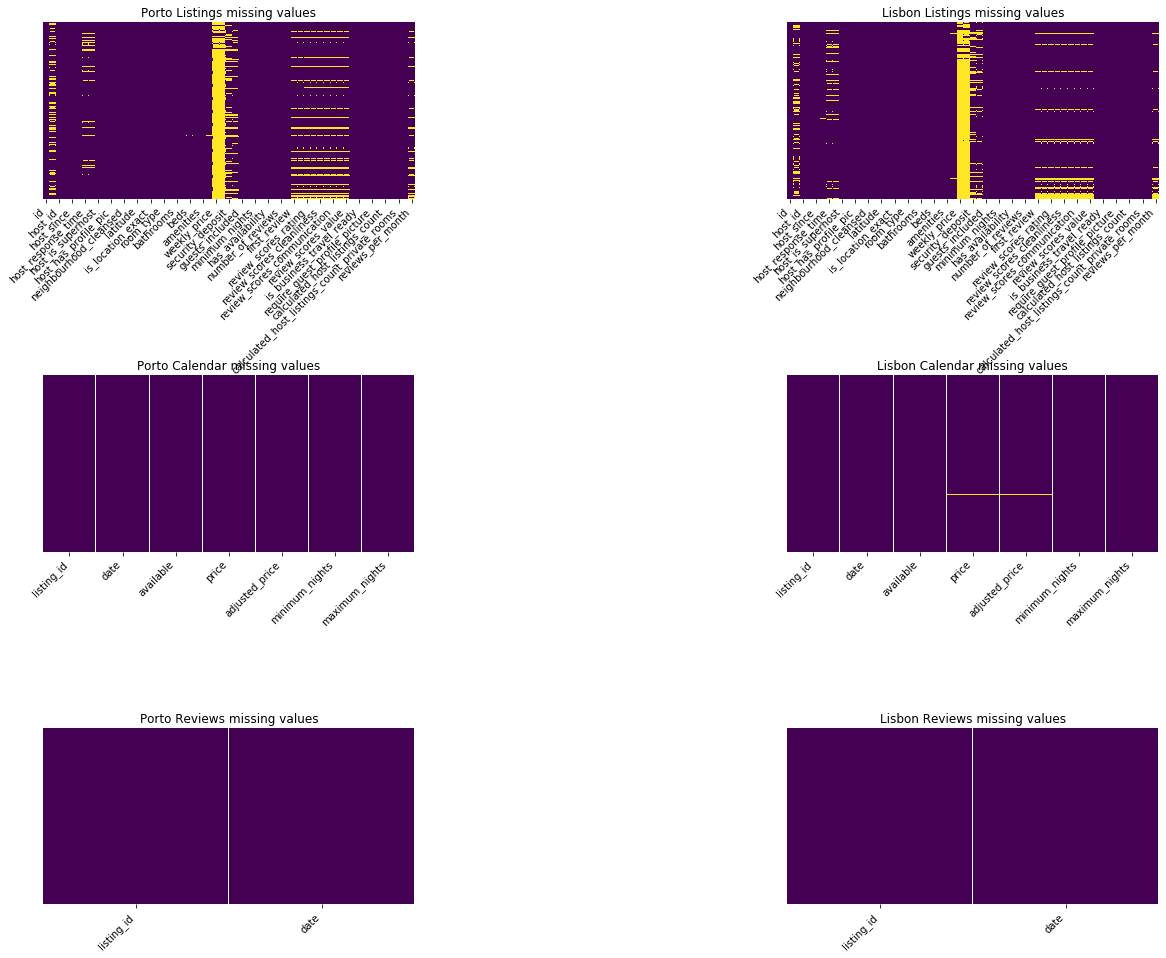

In [27]:
#pyplot is matplotlibs graphing framework, let's use it to make some subplots
fig = plt.figure(figsize = (20,14))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)


sns.heatmap(porto_listings_plus.isnull(), yticklabels = False, cbar = False, cmap='viridis', ax = ax1)
ax1.set_title('Porto Listings missing values')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, horizontalalignment='right')

sns.heatmap(lisbon_listings_plus.isnull(), yticklabels = False, cbar = False, cmap='viridis', ax = ax2)
ax2.set_title('Lisbon Listings missing values')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, horizontalalignment='right')

sns.heatmap(porto_calendar.isnull(), yticklabels = False, cbar = False, cmap='viridis', ax = ax3)
ax3.set_title('Porto Calendar missing values')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 45, horizontalalignment='right')

sns.heatmap(lisbon_calendar.isnull(), yticklabels = False, cbar = False, cmap='viridis', ax = ax4)
ax4.set_title('Lisbon Calendar missing values')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation = 45, horizontalalignment='right')

sns.heatmap(porto_reviews.isnull(), yticklabels = False, cbar = False, cmap='viridis', ax = ax5)
ax5.set_title('Porto Reviews missing values')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation = 45, horizontalalignment='right')

sns.heatmap(lisbon_reviews.isnull(), yticklabels = False, cbar = False, cmap='viridis', ax = ax6)
ax6.set_title('Lisbon Reviews missing values')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation = 45, horizontalalignment='right')


fig.subplots_adjust(top = 1, wspace = 1, hspace = 1)

In [28]:
#checking for missing values
def missing_checker(df, df_type):
    '''
    Takes in a dataframe and determines th number of missing values  
    Args: a dataframe 
    Prints: number of missing values
    '''
    #print('Number of missing values in ' + title + ' is: ')
    #print(df.isnull().sum())
    
    #percentage of missing values
    percent_missing = df.isnull().sum()* 100/len(df)
    #percent_missing_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
    print('_______________________' + df_type + '_______________________')
    print(percent_missing)

In [29]:
missing_checker(porto_listings_plus, 'porto_listings')

_______________________porto_listings_______________________
id                                               0.000000
transit                                         34.497255
host_id                                          0.000000
host_name                                        0.300275
host_since                                       0.300275
host_location                                    0.446122
host_response_time                              12.877488
host_response_rate                              12.877488
host_is_superhost                                0.300275
host_listings_count                              0.300275
host_has_profile_pic                             0.300275
host_identity_verified                           0.300275
neighbourhood_cleansed                           0.000000
neighbourhood_group_cleansed                     0.000000
latitude                                         0.000000
longitude                                        0.000000
is_location

In [30]:
missing_checker(lisbon_listings_plus, 'lisbon_listings')

_______________________lisbon_listings_______________________
id                                               0.000000
transit                                         32.654853
host_id                                          0.000000
host_name                                        0.103768
host_since                                       0.103768
host_location                                    0.267401
host_response_time                              14.587324
host_response_rate                              14.587324
host_is_superhost                                0.103768
host_listings_count                              0.103768
host_has_profile_pic                             0.103768
host_identity_verified                           0.103768
neighbourhood_cleansed                           0.000000
neighbourhood_group_cleansed                     0.000000
latitude                                         0.000000
longitude                                        0.000000
is_locatio

In [31]:
missing_checker(porto_calendar, 'porto_calendar')

_______________________porto_calendar_______________________
listing_id        0.000000
date              0.000000
available         0.000000
price             0.320136
adjusted_price    0.318585
minimum_nights    0.000000
maximum_nights    0.000000
dtype: float64


In [32]:
missing_checker(lisbon_calendar, 'lisbon_calendar')

_______________________lisbon_calendar_______________________
listing_id        0.000000
date              0.000000
available         0.000000
price             0.532834
adjusted_price    0.531478
minimum_nights    0.000000
maximum_nights    0.000000
dtype: float64


In [33]:
missing_checker(porto_reviews, 'porto_reviews')

_______________________porto_reviews_______________________
listing_id    0.0
date          0.0
dtype: float64


In [34]:
missing_checker(lisbon_reviews, 'lisbon_reviews')

_______________________lisbon_reviews_______________________
listing_id    0.0
date          0.0
dtype: float64


There are a few columns related to pricing that have very high numbers of missing values, I am just going to turn them into a boolean column to remark the presence or absence of a values to start with

In [35]:
#to help with the next steps I will extract a list of all the columns that have missing values and need to be dealt with
print('_______________________porto_listings missing list_______________________')
print(porto_listings_plus.columns[porto_listings_plus.isna().any()].tolist())

print('_______________________lisbon_listings missing list_______________________')
print(lisbon_listings_plus.columns[lisbon_listings_plus.isna().any()].tolist())

print('_______________________porto_calendar missing list_______________________')
print(porto_calendar.columns[porto_calendar.isna().any()].tolist())

print('_______________________lisbon_calendar missing list_______________________')
print(lisbon_calendar.columns[lisbon_calendar.isna().any()].tolist())

_______________________porto_listings missing list_______________________
['transit', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
_______________________lisbon_listings missing list_______________________
['transit', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'firs

In [36]:
def missing_values_handler(df, df_type):
    '''
    Takes in a dataframe and creates a column to keep track of missing values
    Also does imputation on some of the missing values
    Args: a dataframe and the name of the dataframe
    Returns: df without missing values
    '''
    
    if df_type == 'listings':
        #dropping columns I won't use
        df.drop(['weekly_price', 'monthly_price'], axis = 1, inplace = True)
        
        #creating a column to keep track of rows with missing values using booleans, missing values will be 0
        df['host_name_present'] = (~df['host_name'].isnull()).astype(int)
        df['transit'] = (~df['transit'].isnull()).astype(int)
        
        #fill NaT with a mock date
        df['last_review_present'] = (~df['last_review'].isnull()).astype(int)
        date_replace = pd.to_datetime('2019-12-31')
        df['last_review'] = df['last_review'].replace({pd.NaT : date_replace})
        
        df['first_review_present'] = (~df['first_review'].isnull()).astype(int)
        date_replace = pd.to_datetime('2019-12-31')
        df['first_review'] = df['first_review'].replace({pd.NaT : date_replace})
        
        df['host_since_present'] = (~df['host_since'].isnull()).astype(int)
        date_replace = pd.to_datetime('2019-12-31')
        df['host_since'] = df['host_since'].replace({pd.NaT : date_replace})
        
                
        #fill the NaNs in remaining columns using sklearn's imputer
        imp = Imputer(missing_values =  np.nan, strategy = 'mean', axis = 0)
        
        df['reviews_p_month_present'] = (~df['reviews_per_month'].isnull()).astype(int)
        
        df['security_deposit'] = (~df['security_deposit'].isnull()).astype(int)
        
        df['reviews_per_month'] = imp.fit_transform(df[['reviews_per_month']]).ravel()
          
        df['host_response_rate'] = imp.fit_transform(df[['host_response_rate']]).ravel()
        
        #and for anything else missing I will just drop it
        df.dropna(inplace = True)
            
    if df_type == 'calendar':
        #the shape of the df demonstrates that it is a 7 figure number of rows show I will just drop
        # the under 200 data points missing
        df.dropna(inplace = True)
        
  
    return df

In [37]:
porto_listings_m = missing_values_handler(porto_listings_plus, 'listings')
lisbon_listings_m = missing_values_handler(lisbon_listings_plus, 'listings')
porto_calendar_m = missing_values_handler(porto_calendar, 'calendar')
lisbon_calendar_m = missing_values_handler(lisbon_calendar, 'calendar')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [38]:
missing_checker(porto_listings_plus, 'porto_listings')

_______________________porto_listings_______________________
id                                              0.0
transit                                         0.0
host_id                                         0.0
host_name                                       0.0
host_since                                      0.0
host_location                                   0.0
host_response_time                              0.0
host_response_rate                              0.0
host_is_superhost                               0.0
host_listings_count                             0.0
host_has_profile_pic                            0.0
host_identity_verified                          0.0
neighbourhood_cleansed                          0.0
neighbourhood_group_cleansed                    0.0
latitude                                        0.0
longitude                                       0.0
is_location_exact                               0.0
property_type                                   0.0
roo

In [39]:
missing_checker(lisbon_listings_plus, 'lisbon_listings')

_______________________lisbon_listings_______________________
id                                              0.0
transit                                         0.0
host_id                                         0.0
host_name                                       0.0
host_since                                      0.0
host_location                                   0.0
host_response_time                              0.0
host_response_rate                              0.0
host_is_superhost                               0.0
host_listings_count                             0.0
host_has_profile_pic                            0.0
host_identity_verified                          0.0
neighbourhood_cleansed                          0.0
neighbourhood_group_cleansed                    0.0
latitude                                        0.0
longitude                                       0.0
is_location_exact                               0.0
property_type                                   0.0
ro

## Princing is one of the factors of focus on this exploration, are there outliers to it?

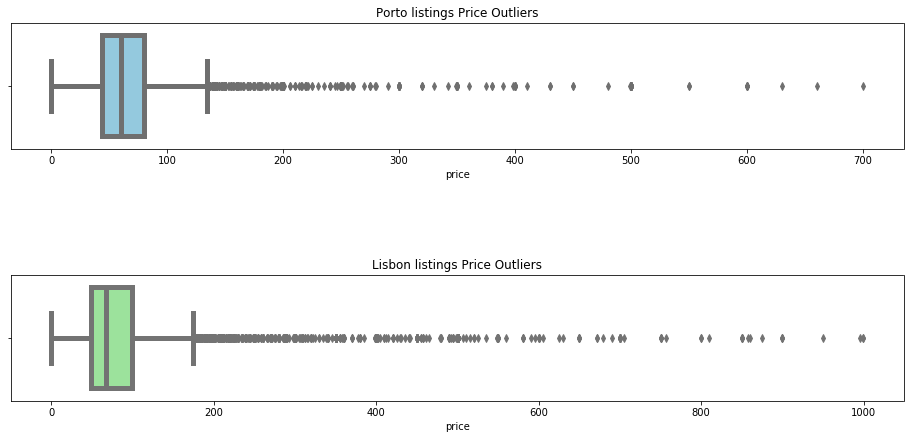

In [53]:
fig = plt.figure(figsize = (16,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1 = sns.boxplot(x = porto_listings_m['price'], ax = ax1, color = 'skyblue', linewidth = 5)
ax1.set_title('Porto listings Price Outliers')

ax1 = sns.boxplot(x = lisbon_listings_m['price'], ax = ax2, color = 'lightgreen', linewidth = 5)
ax2.set_title('Lisbon listings Price Outliers')

fig.subplots_adjust(top = 1, wspace = 1, hspace = 1)

I am curious on what makes some properties so much more expensive than the average, I wonder if there is a luxury market

In [54]:
#sorting based on listing price
porto_listings_m.sort_values(by = 'price', ascending = False, axis = 0, inplace = True)
lisbon_listings_m.sort_values(by = 'price', ascending = False, axis = 0, inplace = True)

#and setting up a minimal df for the top listings
porto_top_price = porto_listings_m.head(50)
lisbon_top_price = lisbon_listings_m.head(50)

In [55]:
porto_top_price.head()

,id,transit,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_name_present,last_review_present,first_review_present,host_since_present,reviews_p_month_present
9575,34746357,1,155005113,Gonçalo,2017-10-17,"Porto, Porto District, Portugal",within an hour,100.0,t,2.0,t,f,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",PORTO,41.16315,-8.63171,t,Apartment,Entire home/apt,4,1.0,1.0,3.0,Real Bed,"{TV,Wifi,Kitchen,Elevator,""Free street parking...",700.0,1,8.0,1,0.0,2,40,t,138,12,12,2019-08-10,2019-11-02,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,moderate,f,f,2,2,0,0,3.24,1,1,1,1,1
6219,24646540,0,124472632,João,2017-04-05,"Porto, Porto District, Portugal",within an hour,91.0,f,28.0,t,f,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",PORTO,41.16105,-8.62371,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",660.0,1,15.0,2,5.0,2,1125,t,359,1,0,2018-06-12,2018-06-12,80.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,flexible,f,f,10,10,0,0,0.06,1,1,1,1,1
1693,10605132,0,27267172,Marcos,2015-02-05,"Viseu District, Portugal",within an hour,100.0,t,8.0,t,t,Lordelo do Ouro e Massarelos,PORTO,41.14838,-8.63308,t,House,Entire home/apt,16,7.0,7.0,10.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets allo...",630.0,1,70.0,15,100.0,1,1125,t,0,64,25,2016-02-17,2019-10-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,f,f,8,8,0,0,1.39,1,1,1,1,1
8668,32123023,1,240225363,Selina,2019-01-31,PA,within a day,50.0,f,6.0,t,f,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",PORTO,41.15054,-8.61521,t,Boutique hotel,Hotel room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Pets allowed...",600.0,0,0.0,1,0.0,1,1125,t,179,2,2,2019-06-10,2019-08-30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,flexible,f,f,6,0,0,0,0.35,1,1,1,1,1
2707,14930866,1,71418269,Bruno,2016-05-11,"Porto, Porto District, Portugal",within a day,100.0,t,1.0,t,f,Melres e Medas,GONDOMAR,41.07951,-8.40364,f,House,Entire home/apt,10,4.5,4.0,7.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",600.0,1,10.0,10,50.0,2,30,t,312,31,13,2016-11-06,2019-08-31,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.83,1,1,1,1,1


In [56]:
lisbon_top_price.head()

,id,transit,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_name_present,last_review_present,first_review_present,host_since_present,reviews_p_month_present
22748,36400980,1,273702328,Menal,2019-07-05,"Lisbon, Lisbon, Portugal",within a day,100.0,f,0.0,t,f,Arroios,Lisboa,38.72572,-9.13412,t,Apartment,Entire home/apt,5,2.0,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,W...",999.0,1,35.0,2,15.0,3,1125,t,353,8,8,2019-08-08,2019-11-11,93.0,10.0,9.0,10.0,9.0,9.0,9.0,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.12,1,1,1,1,1
23037,36834595,1,276843836,Zélia,2019-07-17,PT,within an hour,100.0,f,0.0,t,f,Misericrdia,Lisboa,38.71362,-9.14407,t,Apartment,Entire home/apt,5,2.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Washer,""Smoke dete...",999.0,1,35.0,2,20.0,3,1125,t,346,11,11,2019-07-26,2019-11-06,85.0,9.0,9.0,9.0,9.0,9.0,9.0,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.62,1,1,1,1,1
5791,12172359,1,16696225,Aline,2014-06-12,Monaco,within a few hours,90.0,f,4.0,t,f,"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",Sintra,38.79263,-9.40824,f,House,Entire home/apt,13,8.0,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Pool,Kitchen,""Fre...",995.0,1,292.0,13,70.0,5,1125,t,317,5,1,2016-07-28,2019-08-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,f,f,5,4,1,0,0.12,1,1,1,1,1
16581,27157166,1,62521369,Maria,2016-03-11,"Lisbon, Lisbon, Portugal",within an hour,100.0,f,45.0,t,f,So Vicente,Lisboa,38.71931,-9.13143,t,Apartment,Entire home/apt,10,4.0,4.0,5.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",950.0,1,100.0,1,0.0,2,360,t,322,55,46,2018-08-09,2019-11-16,98.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f,moderate,f,f,30,30,0,0,3.46,1,1,1,1,1
6675,13663995,1,48672786,Intendente 1865 - Apartments -,2015-11-10,"Lisbon, Lisbon, Portugal",within an hour,100.0,t,8.0,t,t,Arroios,Lisboa,38.72218,-9.13380,t,Serviced apartment,Hotel room,16,12.0,12.0,18.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",900.0,1,245.0,12,12.0,2,522,t,339,35,13,2017-05-21,2019-09-30,95.0,9.0,10.0,10.0,10.0,9.0,9.0,t,f,moderate,f,f,8,2,0,0,1.14,1,1,1,1,1


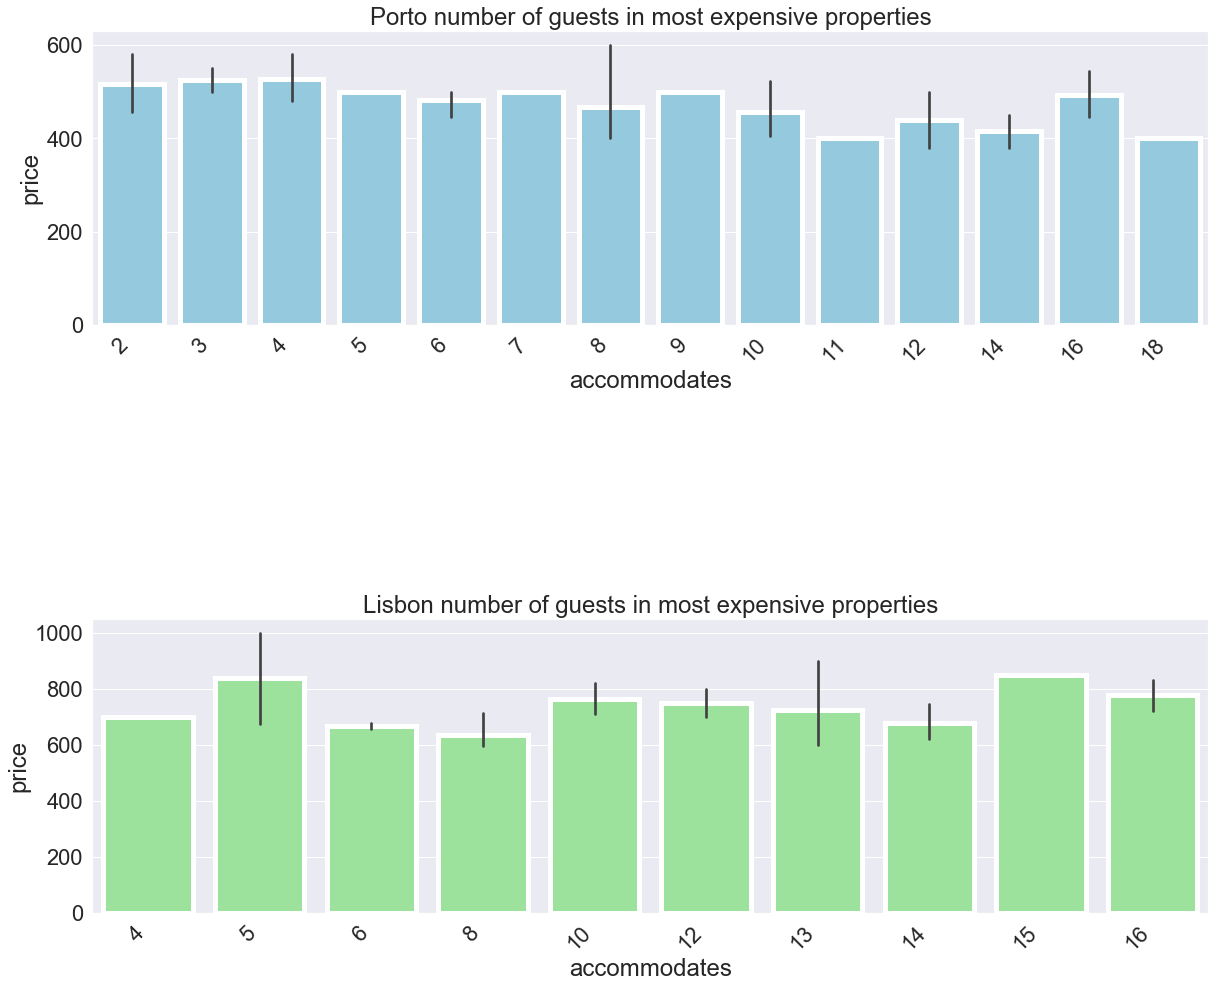

In [70]:
fig = plt.figure(figsize = (20,14))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1 = sns.barplot(x = 'accommodates', y = 'price', data = porto_top_price, ax = ax1, color = 'skyblue', linewidth = 5)
ax1.set_title('Porto number of guests in most expensive properties')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, horizontalalignment='right')


ax2 = sns.barplot(x = 'accommodates', y = 'price', data = lisbon_top_price, ax = ax2, color = 'lightgreen', linewidth = 5)
ax2.set_title('Lisbon number of guests in most expensive properties')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, horizontalalignment='right')

fig.subplots_adjust(top = 1, wspace = 1, hspace = 1)

In [ ]:
fig = plt.figure(figsize = (20,14))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


ax1 = sns.boxplot(x = porto_calendar_m['price'], y = porto_calendar['available'], ax = ax1, )
ax1.set_title('Porto Calendar Pricing Outliers')

ax1 = sns.boxplot(x = lisbon_calendar_m['price'], y = lisbon_calendar['available'], ax = ax2, )
ax2.set_title('Lisbon Calendar Pricing Outliers')

fig.subplots_adjust(top = 1, wspace = 1, hspace = 1)

I suspect that these outliers correspond to the luxury market which can skew the prediction further down the exploration

In [ ]:
porto_listings_m['price'].describe()

In [ ]:
lisbon_listings_m['price'].describe()

Aparently some of the prices actually have a min of 0 dollars which makes no sense so I will remove those. 
Further down it will be important to create a feature corresponding to the price per guest so I can further filter out properties that correspond to the luxury market/outliers.

## Some hosts have multiple listings, which hosts have the greatest number of listings? What if we base the counts on their review scores rating? 

In [ ]:
#sorting based on listing counts
porto_listings_m.sort_values(by = 'host_listings_count', ascending = False, axis = 0, inplace = True)
lisbon_listings_m.sort_values(by = 'host_listings_count', ascending = False, axis = 0, inplace = True)

#and setting up a minimal df for the top listings
porto_top_list_counts = porto_listings_m.head(600)
lisbon_top_list_counts = lisbon_listings_m.head(1025)

#since there are many duplicates in the rows I will drop some of them
porto_top_list_counts_dedup = porto_top_list_counts.drop_duplicates(subset = 'host_id', keep = 'last')
lisbon_top_list_counts_dedup = lisbon_top_list_counts.drop_duplicates(subset = 'host_id', keep = 'last')

In [ ]:
porto_top_list_counts_dedup.shape

In [ ]:
lisbon_top_list_counts_dedup.shape

In [ ]:
fig = plt.figure(figsize = (20,14))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1 = sns.barplot(x = 'host_id', y = 'host_listings_count', data = porto_top_list_counts_dedup, ax = ax1)
ax1.set_title('Porto top 15 hosts with multiple listings')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, horizontalalignment='right')


ax2 = sns.barplot(x = 'host_id', y = 'host_listings_count', data = lisbon_top_list_counts_dedup, ax = ax2)
ax2.set_title('Lisbon top 15 hosts with multiple listings')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, horizontalalignment='right')

fig.subplots_adjust(top = 1, wspace = 1, hspace = 1)

In [ ]:
#sorting based on listing counts
porto_top_list_counts_dedup.sort_values(by = 'host_listings_count', ascending = False, axis = 0, inplace = True)
lisbon_top_list_counts_dedup.sort_values(by = 'host_listings_count', ascending = False, axis = 0, inplace = True)

fig = plt.figure(figsize = (20,14))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1 = sns.barplot(x = 'host_name', y = 'host_listings_count', data = porto_top_list_counts_dedup, ax = ax1)
ax1.set_title('Porto top hosts with multiple listings')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, horizontalalignment='right')


ax2 = sns.barplot(x = 'host_name', y = 'host_listings_count', data = lisbon_top_list_counts_dedup, ax = ax2)
ax2.set_title('Lisbon top hosts with multiple listings')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, horizontalalignment='right')

fig.subplots_adjust(top = 1, wspace = 1, hspace = 1)

## Are the companies with the greatest number of listings the ones with higher review scores?

In [ ]:
#sorting based on reviews
porto_listings_m.sort_values(by = 'review_scores_rating', ascending = False, axis = 0, inplace = True)
lisbon_listings_m.sort_values(by = 'review_scores_rating', ascending = False, axis = 0, inplace = True)

#and setting up a minimal df for the top listings
porto_toprev = porto_listings_m.head(50)
lisbon_toprev = lisbon_listings_m.head(50)

In [ ]:
fig = plt.figure(figsize = (20,14))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1 = sns.barplot(x = 'host_name', y = 'review_scores_rating', data = porto_toprev, ax = ax1)
ax1.set_title('Porto highest rating scores')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, horizontalalignment='right')


ax2 = sns.barplot(x = 'host_name', y = 'review_scores_rating', data = lisbon_toprev, ax = ax2)
ax2.set_title('Lisbon highest rating scores')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, horizontalalignment='right')

fig.subplots_adjust(top = 1, wspace = 1, hspace = 1)

## Which hosts have the highest amount of reviews per month?

In [ ]:
#sorting based on reviews
porto_listings_m.sort_values(by = 'reviews_per_month', ascending = False, axis = 0, inplace = True)
lisbon_listings_m.sort_values(by = 'reviews_per_month', ascending = False, axis = 0, inplace = True)

#and setting up a minimal df for the top listings
porto_toprev = porto_listings_m.head(50)
lisbon_toprev = lisbon_listings_m.head(50)

In [ ]:
fig = plt.figure(figsize = (20,14))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1 = sns.barplot(x = 'host_name', y = 'reviews_per_month', data = porto_toprev, ax = ax1)
ax1.set_title('Porto top hosts with more reviews per month')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, horizontalalignment='right')


ax2 = sns.barplot(x = 'host_name', y = 'reviews_per_month', data = lisbon_toprev, ax = ax2)
ax2.set_title('Lisbon top hosts with more reviews per month')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, horizontalalignment='right')

fig.subplots_adjust(top = 1, wspace = 1, hspace = 1)

which are the names behind these ids?
lisbon_listings.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).nlargest(20)

Well it seems like quantity is not quality, the listings with the most reviews per month do not match the hosts with the biggest number of listings.

## Which are the most popular neighbourhoods in the two cities?

In [ ]:
fig = plt.figure(figsize = (20,14))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1 = sns.countplot(x = 'neighbourhood_group_cleansed', data = porto_listings_m,
                    order = porto_listings_m.neighbourhood_group_cleansed.value_counts().sort_values(ascending=False).index, ax = ax1)
ax1.set_title('Porto Listings accross neighbourhoods')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, horizontalalignment='right')


ax2 = sns.countplot(x = 'neighbourhood_group_cleansed', data = lisbon_listings_m,
                    order = lisbon_listings_m.neighbourhood_group_cleansed.value_counts().sort_values(ascending=False).index, ax = ax2)
ax2.set_title('Lisbon Listings accross neighbourhoods')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, horizontalalignment='right')

fig.subplots_adjust(top = 1, wspace = 1, hspace = 1)

In [ ]:
fig = plt.figure(figsize = (20,14))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1 = sns.countplot(x = 'neighbourhood_cleansed', data = porto_listings_m,
                    order = porto_listings_m.neighbourhood_cleansed.value_counts().iloc[:20].sort_values(ascending=False).index, ax = ax1)
ax1.set_title('Porto top 20 listings accross neighbourhoods')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, horizontalalignment='right')


ax2 = sns.countplot(x = 'neighbourhood_cleansed', data = lisbon_listings_m,
                    order = lisbon_listings_m.neighbourhood_cleansed.value_counts().iloc[:20].sort_values(ascending=False).index, ax = ax2)
ax2.set_title('Lisbon top 20 listings accross neighbourhoods')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, horizontalalignment='right')

fig.subplots_adjust(top = 1, wspace = 1, hspace = 1)

Time to map-up the most popular listings


I will select only the top 1000 listings based on their reviews



lisbon coordinates: 38.736946, -9.142685.



porto coordinates: 41.14961, -8.61099

## I will now map some of the properties with the highest review scores

In [ ]:
#sorting based on reviews
porto_listings_m.sort_values(by = 'review_scores_rating', ascending = False, axis = 0, inplace = True)
lisbon_listings_m.sort_values(by = 'review_scores_rating', ascending = False, axis = 0, inplace = True)

#and setting up a minimal df for the top listings
porto_top1000 = porto_listings_m.head(1000)
lisbon_top1000 = lisbon_listings_m.head(1000)

In [ ]:
#creating a base maps
lat_l = 38.736946
long_l = -9.142685

lat_p = 41.14961
long_p = -8.61099

base_l = folium.Map(location=[lat_l,long_l], zoom_start=12)
base_p = folium.Map(location=[lat_p,long_p], zoom_start=12)

neighbourhoods = folium.map.FeatureGroup()

In [ ]:
#mapping porto
for lati, longi in zip(porto_top1000.longitude, porto_top1000.latitude):
    neighbourhoods.add_child(folium.CircleMarker([longi, lati], radius = 2, color = 'blue', fill = True))

base_p.add_child(neighbourhoods)

In [ ]:
#mapping lisbon
for lati, longi in zip(lisbon_top1000.longitude, lisbon_top1000.latitude):
    neighbourhoods.add_child(folium.CircleMarker([longi, lati], radius = 2, color = 'red', fill = True))

base_l.add_child(neighbourhoods)

## Is there seasonality to the listings prices? 

In [ ]:
#determining the mean values of the listings
mean_price_porto = porto_calendar_m.groupby('date').mean()
mean_price_lisbon = lisbon_calendar_m.groupby('date').mean()

In [ ]:
fig = plt.figure(figsize=(10,5),dpi=300)
ax = fig.add_axes([0,0,1,1])

ax.plot(mean_price_porto['price'], label = 'Porto')
ax.plot(mean_price_lisbon['price'], label = 'Lisbon')

ax.set_title('Listings Mean prices')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Average Listing Price')

There are very clear variations on the prices:
* first peak corresponds to NYE
* second peak probably corresponds to the 25th of April in Portugal
* third peak in porto probably corresponds to Saint John's celebrations/NOS Music festival/F1 Grand Prix

Before the next few steps I want to do some feature engineering to improve the status of some of categorical attributes

## Which are the most expensive neighbourhoods?

In [ ]:
porto_grouped = pd.DataFrame(porto_listings_m.groupby(['neighbourhood_group_cleansed'])['price'].agg(np.median))
porto_grouped.reset_index(inplace=True)
lisbon_grouped = pd.DataFrame(lisbon_listings_m.groupby(['neighbourhood_group_cleansed'])['price'].agg(np.median))
lisbon_grouped.reset_index(inplace=True)

In [ ]:
porto_grouped.sort_values(by=['price'], ascending=True).plot(kind='barh', x='neighbourhood_group_cleansed', y='price', 
                                                          figsize=(10,6), legend=False)

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Neighbourhood\n', fontsize=14, fontweight='bold')

In [ ]:
lisbon_grouped.sort_values(by=['price'], ascending=True).plot(kind='barh', x='neighbourhood_group_cleansed', y='price', 
                                                          figsize=(10,6), legend=False)

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices\n', fontsize=14, fontweight='bold')

In [ ]:
porto_grouped_2 = pd.DataFrame(porto_listings_m.groupby(['neighbourhood_cleansed'])['price'].agg(np.median))
porto_grouped_2.reset_index(inplace=True)
lisbon_grouped_2 = pd.DataFrame(lisbon_listings_m.groupby(['neighbourhood_cleansed'])['price'].agg(np.median))
lisbon_grouped_2.reset_index(inplace=True)

In [ ]:
#sorting based on reviews
porto_grouped_2.sort_values(by = 'price', ascending = False, axis = 0, inplace = True)
lisbon_grouped_2.sort_values(by = 'price', ascending = False, axis = 0, inplace = True)

#and setting up a minimal df for the top listings
porto_top40 = porto_grouped_2.head(40)
lisbon_top40 = lisbon_grouped_2.head(40)

In [ ]:
porto_top40.sort_values(by=['price'], ascending=True).plot(kind='barh', x='neighbourhood_cleansed', y='price', 
                                                          figsize=(20,12), legend=False)

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('Neighbourhood\n', fontsize=12)
plt.title('\nPorto: Median Prices by Neighbourhood\n', fontsize=14, fontweight='bold')

In [ ]:
lisbon_top40.sort_values(by=['price'], ascending=True).plot(kind='barh', x='neighbourhood_cleansed', y='price', 
                                                          figsize=(20,12), legend=False)

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('Neighbourhood\n', fontsize=12)
plt.title('\nLisbon: Median Prices by Neighbourhood\n', fontsize=14, fontweight='bold')

### Feature Engineering

In [ ]:
def enc_and_eng(df, df_type):
    '''
    Takes in a dataframe and the string corresponding to the df_type and does feature encoding
    Args: a dataframe and the name of the dataframe
    Returns: df with encoded features
    '''
    if df_type == 'listings':
        
        #dealing with the amenities column, just turn them into a count of available amenities
        df['amenities'] = df['amenities'].str.replace('"', '')
        df['amenities_count'] = df.amenities.str.count(',').add(1)
        
        #creating a list of the categorical features I want to get dummies for
        cat_features = ['neighbourhood_group_cleansed', 'neighbourhood_cleansed', 'bed_type', 'property_type']
        
        #getting dummies
        df = pd.get_dummies(df, columns = cat_features, prefix = cat_features, drop_first = True)
        
        #creating a dictionary for the replacements in room types
        room_types = {'Entire home/apt' : 1, 'Private room' : 2, 'Hotel room' : 3, 'Shared room' : 4}
        df['room_type'] = df['room_type'].map(room_types)
        
        #creating dictionary to replace host_response_time
        resp_time = {'a few days or more' : 1, 'within a day' : 2, 'within a few hours' : 3, 'within an hour' : 4}
        df['host_response_time'] = df['host_response_time'].map(resp_time) 
        
        #creating a column corresponding to the time in operation
        df['time_in_operation'] = (df['last_review'] - df['host_since']).dt.days
        
        #creating feature for time until first review after first posting the listing
        df['time_2_first_review'] = (df['first_review'] - df['host_since']).dt.days
        
        #dealing with the cancelation policies column
        canc_types = {'flexible' : 1, 'moderate' : 2, 'strict' : 3, 'strict_14_with_grace_period' : 3,
                      'super_strict_30' : 4, 'super_strict_60' : 5}
        df['cancellation_policy'] = df['cancellation_policy'].map(canc_types)
        
        #handling host location
        df['host_location'] =  df['host_location'].str.lower()
        df['host_in_pt'] = df['host_location'].str.contains('portugal')
        df['host_in_pt'] = df['host_in_pt'].astype(int)
        
           
        #encoding the boolean columns
        bool_to_bin = {'f' : 0, 't' : 1}
        df['host_is_superhost'] = df['host_is_superhost'].map(bool_to_bin) 
        df['host_has_profile_pic'] = df['host_has_profile_pic'].map(bool_to_bin)
        df['host_identity_verified'] = df['host_identity_verified'].map(bool_to_bin)
        df['is_location_exact'] = df['is_location_exact'].map(bool_to_bin)
        df['has_availability'] = df['has_availability'].map(bool_to_bin)
        df['instant_bookable'] = df['instant_bookable'].map(bool_to_bin)
        df['is_business_travel_ready'] = df['is_business_travel_ready'].map(bool_to_bin)
        df['require_guest_profile_picture'] = df['require_guest_profile_picture'].map(bool_to_bin)
        df['require_guest_phone_verification'] = df['require_guest_phone_verification'].map(bool_to_bin)
        
        #creating a feature corresponding to the price per guest
        df['price_per_guest'] = (df['price']/df['accommodates'])

        df.drop(['amenities', 'host_name', 'host_location', 'host_since', 'first_review', 'last_review'], axis = 1, inplace = True)
        
    if df_type == 'calendar':
        #replacing the t and f in the available column with booleans
        available_type = {'f' : 0, 't' : 1}
        df['availability'] = df['available'].map(available_type)
        
    return df

In [ ]:
porto_listings_c = enc_and_eng(porto_listings_m, 'listings')
lisbon_listings_c = enc_and_eng(lisbon_listings_m, 'listings')
porto_calendar_c = enc_and_eng(porto_calendar_m, 'calendar')
lisbon_calendar_c = enc_and_eng(lisbon_calendar_m, 'calendar')

### How does the availability of the properties look like throughout the dates present in the dataset?

In [ ]:
fig = plt.figure(figsize=(10,5),dpi=300)

ax = fig.add_axes([0,0,1,1])
ax.hist(lisbon_calendar_c.groupby('listing_id').mean()['availability'],bins=10,alpha=0.5, label='Lisbon', color='#ff7f0e')
ax.hist(porto_calendar_c.groupby('listing_id').mean()['availability'],bins=10,alpha=0.5, label='Porto')
ax.legend()
ax.set_xlabel('Proportion of Days Available')
ax.set_ylabel('Listings counts')


In [ ]:
print('______________' + 'Porto availability at any given time %' + '______________')
print('______________________', str(porto_calendar_c['availability'].mean()*100), '_______________________')
print('______________' + 'Lisbon availability at any given time %' + '_____________')
print('______________________', str(lisbon_calendar_c['availability'].mean()*100), '______________________')

It looks like there is a group of listings that spend most of their time on airbnb completely available. Curious if in the end we will discover why.
Other than that these are good news for travelers, you have a high chance to always find a place to stay.

## Princing is one of the factors of focus on this exploration, now that I have a feature that normalizes the price of the properties based on the number of guests that they accommodate are their outliers/luxury market?

In [ ]:
fig = plt.figure(figsize = (20,14))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1 = sns.boxplot(x = porto_listings_c['price_per_guest'], ax = ax1)
ax1.set_title('Porto listings Pricing per Guest Outliers')

ax2 = sns.boxplot(x = lisbon_listings_c['price_per_guest'], ax = ax2)
ax2.set_title('Lisbon listings Pricing per guest Outliers')

fig.subplots_adjust(top = 1, wspace = 1, hspace = 1)

In [ ]:
porto_listings_c['price_per_guest'].describe()

In [ ]:
lisbon_listings_c['price_per_guest'].describe()

Since there are some listings with a value of 0 and many that have a max value much higher than the mean I will filter some of these values out

In [ ]:
porto_listings_c.drop(porto_listings_c[(porto_listings_c.price_per_guest > 60) | (porto_listings_c.price_per_guest < 5)]
                     .index, axis = 0, inplace = True)

porto_listings_c['price_per_guest'].describe()

In [ ]:
lisbon_listings_c.drop(lisbon_listings_c[(lisbon_listings_c.price_per_guest > 70) | (lisbon_listings_c.price_per_guest < 5)]
                     .index, axis = 0, inplace = True)

lisbon_listings_c['price_per_guest'].describe()

### Feature Selection

In [ ]:
fig = plt.figure(figsize = (20,14))
ax1 = fig.add_subplot(111)

corr_matrix_porto = porto_listings_c.corr(method = 'spearman')
ax1 = sns.heatmap(corr_matrix_porto, cmap="YlGnBu", linewidths=0.1, ax = ax1)
ax1.set_title('Correlation Matrix Porto Listings', fontsize=16)

Unfortunately for now there are simply too many features to be able to properly check correlations. I will address feature selection on a separate notebook.

In [ ]:
#saving the data files for the listings after feature engineering for model testing
porto_listings_c.to_csv(r"C:\Users\sousa\Desktop\github\Airbnb Tale of 2 cities\Data Portugal\porto_listings.csv")
lisbon_listings_c.to_csv(r"C:\Users\sousa\Desktop\github\Airbnb Tale of 2 cities\Data Portugal\lisbon_listings.csv")

In [ ]:
#to help with the next steps I will extract a list of all the columns that have missing values and need to be dealt with
print('_______________________porto_listings missing list_______________________')
print(porto_listings_c.columns[porto_listings_c.isna().any()].tolist())

print('_______________________lisbon_listings missing list_______________________')
print(lisbon_listings_c.columns[lisbon_listings_c.isna().any()].tolist())

## Attempting to create animation of surgence of listings